In [1]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [2]:
import numpy as np
import pickle
import matplotlib.pyplot as plt
from sklearn import svm, datasets, multiclass
from gensvm import GenSVM

In [3]:
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ['Computer Modern'],
    "font.size": 14
})

In [4]:
def make_meshgrid(x, y, h=0.005):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    return xx, yy


def plot_contours(ax, clf, xx, yy, trainX=None, **params):
    if trainX is not None:
        Z = clf.predict(np.c_[xx.ravel(), yy.ravel()], trainX=trainX)
    else:
        Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

In [5]:
n_samples = 100
# uncomment if you want to generate a new dataset
"""scale = [0.2, 0.2]
X_train = [
    np.random.normal([3.7, 3.4], scale, size=(n_samples, 2)),
    np.random.normal([5.32, 4.62], scale, size=(n_samples, 2)),
    np.random.normal([5.86, 2.3 ], scale, size=(n_samples, 2))
]"""
with open('pickle/simple_demo.pkl', 'rb') as d:
    X_train = pickle.load(d)
y_train = [
    [0] * n_samples,
    [1] * n_samples,
    [2] * n_samples
]

X = np.concatenate(X_train)
X0 = X[:, 0]
X1 = X[:, 1]
y = np.concatenate(y_train)

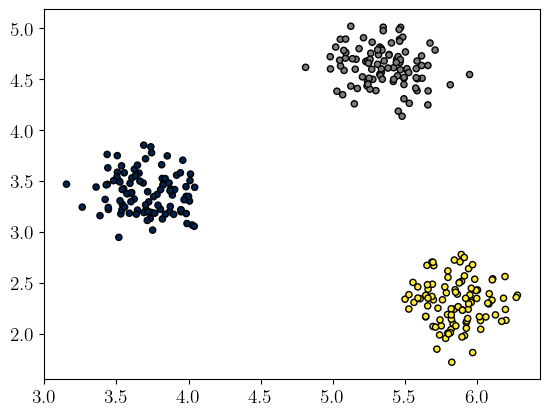

In [6]:
plt.scatter(X0, X1, c=y, cmap='cividis', s=20, edgecolors="k")
plt.savefig('simple_raw.pdf')
plt.show()

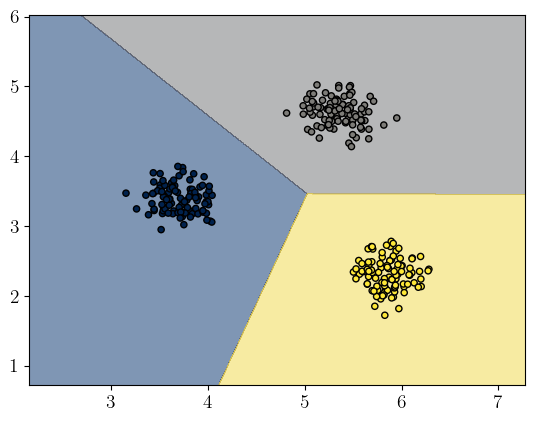

In [7]:
clf = GenSVM()
clf.fit(X, y)

xx, yy = make_meshgrid(X0, X1)
plot_contours(plt, clf, xx, yy, X, cmap='cividis', alpha=0.5)
plt.scatter(X0, X1, c=y, cmap='cividis', s=20, edgecolors="k")
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

plt.savefig('simple_gensvm.pdf')
plt.show()

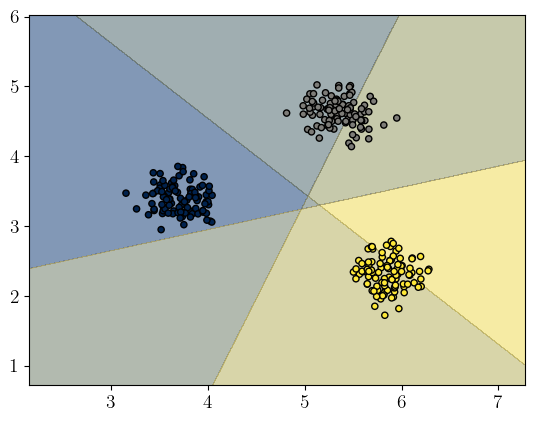

In [8]:
def plot_single_clf(plt, clf, X_train, y_train):
    clf.fit(X_train, y_train)
    xx, yy = make_meshgrid(X0, X1)
    plot_contours(plt, clf, xx, yy, cmap='cividis', alpha=0.2)

# 0 vs 1
clf01 = svm.SVC(kernel='linear')
X_train01 = np.concatenate([X_train[0], X_train[1]])
y_train01 = np.concatenate([y_train[0], y_train[1]])
plot_single_clf(plt, clf01, X_train01, y_train01)

# 0 vs 2
clf02 = svm.SVC(kernel='linear')
X_train02 = np.concatenate([X_train[0], X_train[2]])
y_train02 = np.concatenate([y_train[0], y_train[2]])
plot_single_clf(plt, clf02, X_train02, y_train02)

# 1 vs 2
clf12 = svm.SVC(kernel='linear')
X_train12 = np.concatenate([X_train[1], X_train[2]])
y_train12 = np.concatenate([y_train[1], y_train[2]])
plot_single_clf(plt, clf12, X_train12, y_train12)

plt.scatter(X[:, 0], X[:, 1], c=y, cmap='cividis', s=20, edgecolors="k")
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.savefig('simple_ovo.pdf')
plt.show()

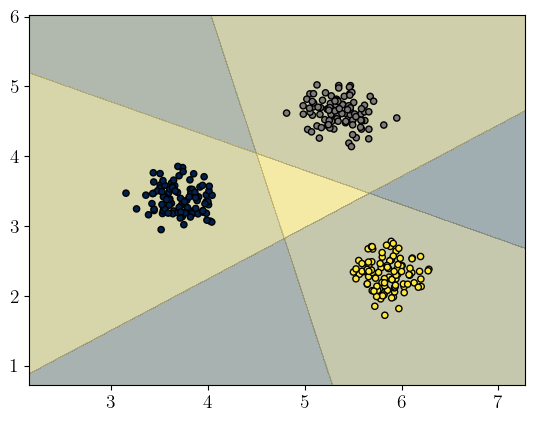

In [9]:
# 0
clf0 = svm.SVC(kernel='linear')
y_train0 = np.concatenate([y_train[0], y_train[1], y_train[1]])
plot_single_clf(plt, clf0, X, y_train0)

# 1
clf1 = svm.SVC(kernel='linear')
y_train1 = np.concatenate([y_train[1], y_train[0], y_train[1]])
plot_single_clf(plt, clf1, X, y_train1)

# 2
clf2 = svm.SVC(kernel='linear')
y_train2 = np.concatenate([y_train[1], y_train[1], y_train[0]])
plot_single_clf(plt, clf0, X, y_train2)

plt.scatter(X[:, 0], X[:, 1], c=y, cmap='cividis', s=20, edgecolors="k")
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.savefig('simple_ova.pdf')
plt.show()